In [1]:
using EPhys, PyPlot

In [3]:
bsnms = ["mam5-160307";
    "mam9-160528"; "mam9-160524"; "mam9-160527";
    "mam10-170213"]
dataloc = "/mnfs/vtad1/data/amorley_merged/"
allmetadata = getmetadata.(bsnms, [dataloc])
allsessions = [find(contains.(x["desen"],"sq flicker"))
    for x in allmetadata];

In [6]:
## Just choose one day

day = 1
bsnm = bsnms[day]
sessions = allsessions[day]
metadata = allmetadata[day];

In [5]:
lfp = load(LFP,metadata,sessions);

In [7]:
testsignal = EPhys.signal(lfp.lfp[1])[1:10*floor(Int,lfp.fs)];

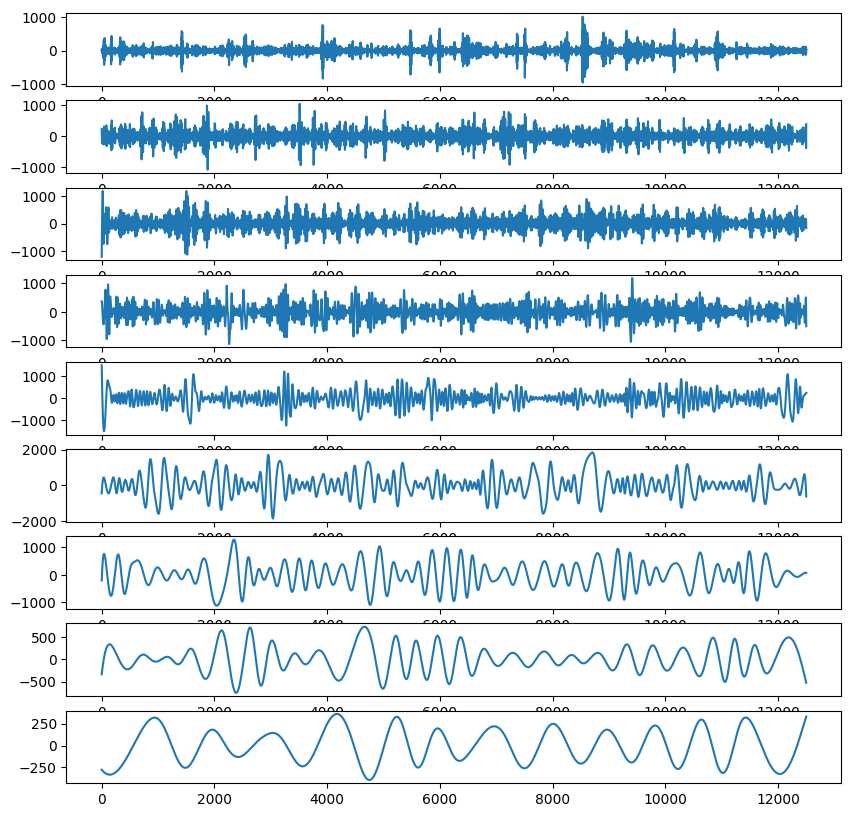

In [98]:
N = 9
n = length(testsignal)
t = [linspace(0,n,n);]

C = EMD.IMF(testsignal, t, N=N)
fig,axs = subplots(size(C,2),1,figsize=(10,10))

for i in indices(C,2)
    ax = axs[i]
    ax[:plot](C[:,i])
end

In [156]:
x=0; order=4; window=0; fs = 1250

    n,N = size(C)
    n = length(t)

    if x == 0
        x = t+1e-6
    end

    if window == 0
        window = ones(length(x))
    end

    nx = length(x)
    Phi = zeros(nx,N)

    for i =1:N
        H1 = Spline1D(t, C[:,i], k = order)

    Phi[2:end,i] = (fs/2π) .* diff(angle.(hilbert(H1[x])))
        #abs(hilbert(H1[x]))

       Phi[:,i] = Phi[:,i].*window
    end


In [198]:
include("$EPhysLP/../../../EMD/src/EMD.jl")

EMD

In [199]:
x = [linspace(0,n,n);]

Phi = EMD.IF(C, t, x, fs=1)

12500×9 Array{Float64,2}:
  0.146685     0.183788    0.904055  …  -0.835118  -0.725943  0.576186
  0.292674     0.258293   -0.841514     -0.629609  -0.763667  0.612641
  0.518109     0.461977   -0.77989      -0.5836    -0.749222  0.612448
  0.77894      0.615261   -0.67137      -0.53601   -0.75577   0.632939
 -0.865699     0.731085   -0.612933     -0.503011  -0.742796  0.632719
 -0.429534     0.893692   -0.545499  …  -0.474227  -0.742613  0.648516
  0.0488239    0.994456   -0.490909     -0.447209  -0.73061   0.648278
  0.465245    -0.842106   -0.441101     -0.42541   -0.727622  0.661685
  0.702062    -0.722008   -0.389689     -0.401976  -0.716332  0.661435
  0.872786    -0.559156   -0.348675     -0.383814  -0.711856  0.673343
 -0.848366    -0.394189   -0.299692  …  -0.362825  -0.701124  0.673084
 -0.55494     -0.235138   -0.263219     -0.346903  -0.695748  0.683939
 -0.233728    -0.0161743  -0.215995     -0.327714  -0.685473  0.683674
  ⋮                                  ⋱             

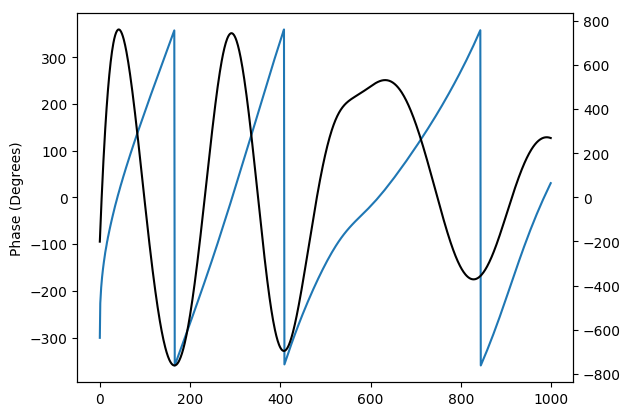

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3f39363350>

In [202]:
ax = subplot(111)
ax[:plot](Phi[1:1000,end-2]*360, label="Inst Phase")
ax[:set_ylabel]("Phase (Degrees)")
ax[:twinx]()[:plot](C[1:1000,end-2], color="k", label="")

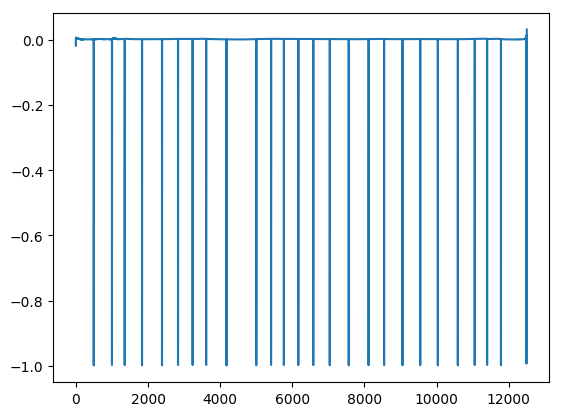

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3f3c4fa050>

In [123]:
plot(Phi[:,end-1])
#plot(C[:,end-1])

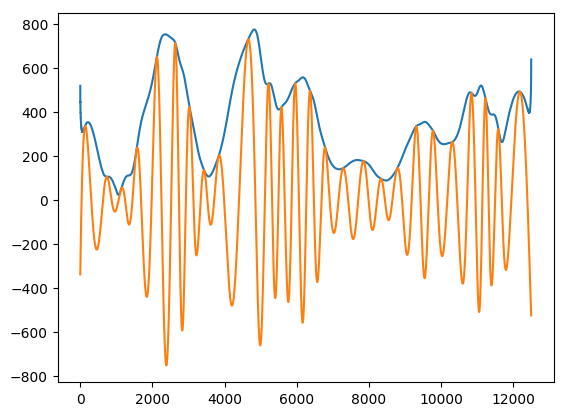

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3f3d8cc950>

In [79]:
plot(Phi[:,end-1])
plot(C[:,end-1])

In [58]:
import Base.getindex

getindex(S::Dierckx.Spline1D, ind::T) where T<:Real = S(ind)
getindex(S::Dierckx.Spline1D, inds::T) where T<:AbstractArray = [S(ind) for ind in inds]

getindex (generic function with 378 methods)

In [61]:
using DSP


12500-element Array{Float64,1}:
   22.0192 
   22.0676 
   -2.15808
  -32.7493 
  -40.8456 
   10.3654 
   52.6479 
    5.71838
  -26.7549 
  -57.1517 
  -72.4712 
  -15.083  
   66.1387 
    ⋮      
  -53.4833 
  120.453  
  117.267  
  -43.0177 
 -122.656  
   11.3069 
  107.038  
   29.9556 
  -41.391  
  -80.3204 
   51.9807 
   47.4576 

In [57]:
@edit getindex([1,1,])

LoadError: [91msyntax: invalid "::" syntax[39m

In [33]:
EMD.IF(C,t)

(size(t), size(C[:, i]), :k => order) = ((12500,), (12500,), :k=>4)


LoadError: [91mMethodError: no method matching (::Dierckx.Spline1D)(::Array{Float64,1}, ::Array{Float64,1})[0m
Closest candidates are:
  Spline1D(::AbstractArray{T,1} where T) at /home/data/.julia/v0.6/Dierckx/src/Dierckx.jl:1042[39m

In [21]:
methods(Spline1D)

# 6 methods for generic function "(::Type)":
Dierckx.Spline1D(t::Array{Float64,1}, c::Array{Float64,1}, k::Int64, bc::Int64, fp::Float64, wrk::Array{Float64,1}) in Dierckx at /home/data/.julia/v0.6/Dierckx/src/Dierckx.jl:80
Dierckx.Spline1D(x::AbstractArray{T,1} where T, y::AbstractArray{T,1} where T; w, k, s, bc, periodic) in Dierckx at /home/data/.julia/v0.6/Dierckx/src/Dierckx.jl:124
Dierckx.Spline1D(x::AbstractArray{T,1} where T, y::AbstractArray{T,1} where T, knots::AbstractArray{T,1} where T; w, k, bc, periodic) in Dierckx at /home/data/.julia/v0.6/Dierckx/src/Dierckx.jl:199
Dierckx.Spline1D(t, c, k, bc, fp) in Dierckx at /home/data/.julia/v0.6/Dierckx/src/Dierckx.jl:89
Dierckx.Spline1D(t, c, k, bc, fp, wrk) in Dierckx at /home/data/.julia/v0.6/Dierckx/src/Dierckx.jl:80
(::Type{T})(arg) where T in Base at sysimg.jl:24

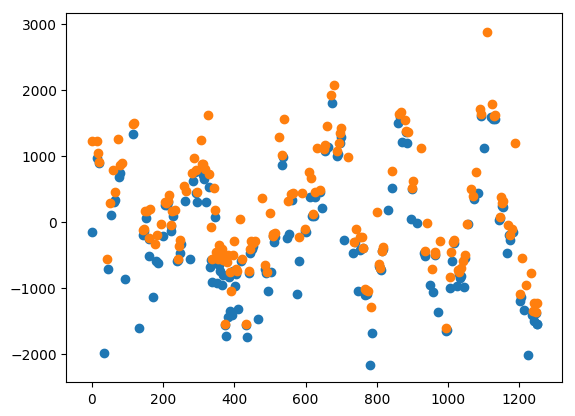

PyObject <matplotlib.collections.PathCollection object at 0x7f1cbf362e10>

In [95]:
scatter(tmin, min_ar, label="minima")
scatter(tmax, max_ar, label="maxima")

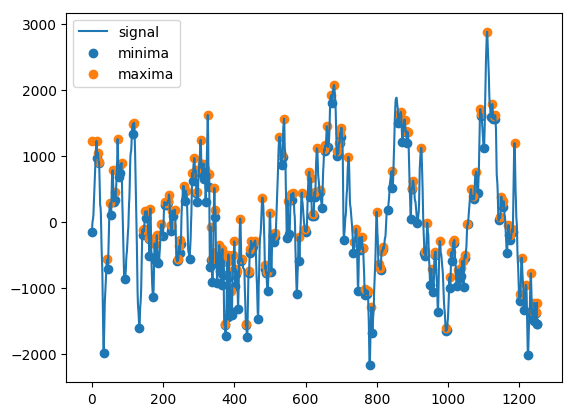

PyObject <matplotlib.legend.Legend object at 0x7f1cbf48e390>

In [94]:
scatter(tmin, min_ar, label="minima")
scatter(tmax, max_ar, label="maxima")
plot(t,testsignal, label = "signal")

legend()

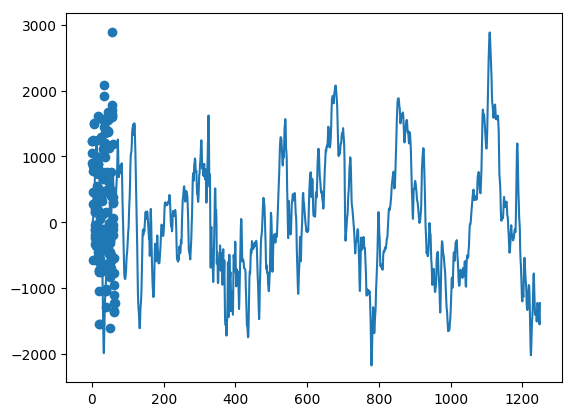

PyObject <matplotlib.collections.PathCollection object at 0x7f1cc018f250>

In [60]:
plot(tempy)
